### Import Libraries

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import cv2
%matplotlib inline

from keras.layers import Dense
from keras.models import Sequential
from keras.preprocessing import image

from sklearn.model_selection import train_test_split

### Create a random number generator

In [62]:
seed = 42
rng = np.random.RandomState(seed)


In [63]:
import os
os.path.abspath(os.getcwd())

'C:\\DS\\ML1\\Project\\emergency_classification\\emergency_classification'

### Read the class mapping file

In [64]:
data = pd.read_csv("C:\\DS\\ML1\\Project\\emergency_classification\\emergency_classification\\emergency_classification.csv")

In [65]:
#First 5 rows
data.head(5)

,image_names,emergency_or_not
0,0.jpg,1
1,1.jpg,1
2,2.jpg,1
3,3.jpg,1
4,4.jpg,1


### Loading the data 

In [66]:
X = []
for img_name in data.image_names:
    img = plt.imread("C:\\DS\\ML1\\Project\\emergency_classification\\emergency_classification\\images\\" + img_name)
    X.append(img)
    


In [68]:
print(X[:3])

[array([[[115, 134, 141],
        [116, 135, 142],
        [116, 135, 142],
        ...,
        [ 70,  81,  87],
        [ 74,  85,  91],
        [ 82,  93,  99]],

       [[115, 134, 141],
        [116, 135, 142],
        [116, 135, 142],
        ...,
        [ 82,  93,  99],
        [ 82,  93,  99],
        [ 83,  94, 100]],

       [[115, 134, 141],
        [116, 135, 142],
        [116, 135, 142],
        ...,
        [ 77,  88,  94],
        [ 75,  86,  92],
        [ 76,  87,  93]],

       ...,

       [[ 39,  39,  37],
        [ 36,  36,  34],
        [ 35,  35,  33],
        ...,
        [ 42,  41,  39],
        [ 45,  44,  42],
        [ 43,  42,  40]],

       [[ 38,  38,  36],
        [ 37,  37,  35],
        [ 36,  36,  34],
        ...,
        [ 45,  44,  42],
        [ 43,  42,  40],
        [ 34,  33,  31]],

       [[ 33,  33,  31],
        [ 33,  33,  31],
        [ 32,  32,  30],
        ...,
        [ 43,  42,  40],
        [ 34,  33,  31],
        [ 20,  19,  17]

### Converting the image list into numpy array 

In [69]:
print(X[0:3])

[array([[[115, 134, 141],
        [116, 135, 142],
        [116, 135, 142],
        ...,
        [ 70,  81,  87],
        [ 74,  85,  91],
        [ 82,  93,  99]],

       [[115, 134, 141],
        [116, 135, 142],
        [116, 135, 142],
        ...,
        [ 82,  93,  99],
        [ 82,  93,  99],
        [ 83,  94, 100]],

       [[115, 134, 141],
        [116, 135, 142],
        [116, 135, 142],
        ...,
        [ 77,  88,  94],
        [ 75,  86,  92],
        [ 76,  87,  93]],

       ...,

       [[ 39,  39,  37],
        [ 36,  36,  34],
        [ 35,  35,  33],
        ...,
        [ 42,  41,  39],
        [ 45,  44,  42],
        [ 43,  42,  40]],

       [[ 38,  38,  36],
        [ 37,  37,  35],
        [ 36,  36,  34],
        ...,
        [ 45,  44,  42],
        [ 43,  42,  40],
        [ 34,  33,  31]],

       [[ 33,  33,  31],
        [ 33,  33,  31],
        [ 32,  32,  30],
        ...,
        [ 43,  42,  40],
        [ 34,  33,  31],
        [ 20,  19,  17]

In [70]:
X = np.array(X)

y = data.emergency_or_not.values

In [74]:
ten = plt.imread("C:\\DS\\ML1\\Project\\emergency_classification\\emergency_classification\\images\\10.jpg")
dims = np.shape(ten)
print(dims)

(224, 224, 3)


In [75]:
#we are checking it's 3 band (RGB), byte scaled (0-255)
np.min(ten), np.max(ten)



(0, 255)

In [76]:
#collapsing Spatial dimensions in order to have pixels by matrix of color channels


pixel_matrix = np.reshape(ten, (dims[0] * dims[1], dims[2]))
print(np.shape(pixel_matrix))

(50176, 3)


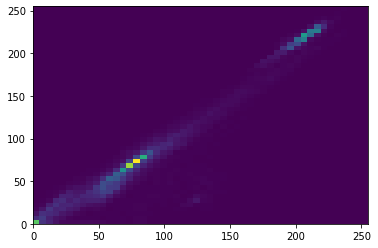

In [80]:
# As we can see there 
z = plt.hist2d(pixel_matrix[:,1], pixel_matrix[:,2], bins=(50,50))
    

In [82]:
eith = plt.imread('C:\\DS\\ML1\\Project\\emergency_classification\\emergency_classification\\images\\18.jpg')
dims = np.shape(eith)
pixel_matrix18 = np.reshape(eith, (dims[0] * dims[1], dims[2]))

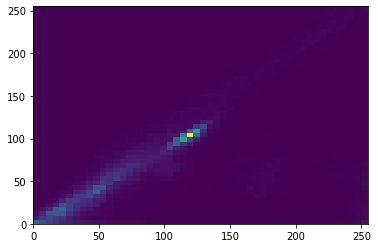

In [83]:

eithresult = plt.hist2d(pixel_matrix18[:,1], pixel_matrix18[:,2], bins=(50,50))

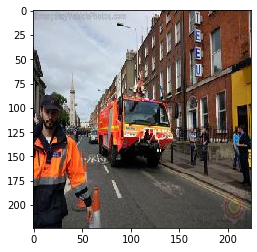

In [86]:
plt.imshow(ten) 

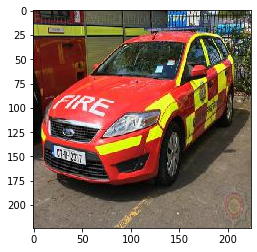

In [87]:
plt.imshow(eith)

#### As we can see above there are different pixel density for different images the above one is far so the images work in a different pattern for different images . IF these pictures were same from different angles then the plots must have been similar.

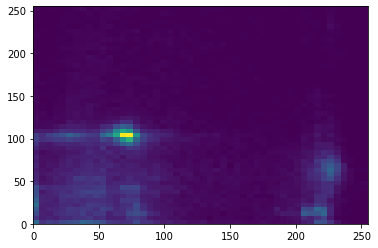

In [89]:
#We can compare the 2 images by finding the difference and plotting it . As we can see there is no similairt in the image , otherwise the plot have been much better , with lot of heat
z1018 = plt.hist2d(pixel_matrix[:,2], pixel_matrix18[:,2], bins=(50,50))

### Changing the shape of the input to make it compatible for neural networks

In [39]:
X = X.reshape(2352,224*224*3)

In [49]:
print(np.shape(X))

(2352, 150528)


(array([[ 35.,   7.,   4., ...,   0.,   0.,   0.],
        [ 13.,  13.,   5., ...,   0.,   0.,   0.],
        [  4.,   6.,  10., ...,   0.,   0.,   0.],
        ...,
        [  0.,   0.,   0., ...,  10.,   9.,  16.],
        [  0.,   0.,   0., ...,   0.,  12.,  15.],
        [  0.,   0.,   0., ...,   7.,  13., 171.]]),
 array([0.        , 0.01666667, 0.03333333, 0.05      , 0.06666667,
        0.08333333, 0.1       , 0.11666667, 0.13333333, 0.15      ,
        0.16666667, 0.18333333, 0.2       , 0.21666667, 0.23333333,
        0.25      , 0.26666667, 0.28333333, 0.3       , 0.31666667,
        0.33333333, 0.35      , 0.36666667, 0.38333333, 0.4       ,
        0.41666667, 0.43333333, 0.45      , 0.46666667, 0.48333333,
        0.5       , 0.51666667, 0.53333333, 0.55      , 0.56666667,
        0.58333333, 0.6       , 0.61666667, 0.63333333, 0.65      ,
        0.66666667, 0.68333333, 0.7       , 0.71666667, 0.73333333,
        0.75      , 0.76666667, 0.78333333, 0.8       , 0.81666667,

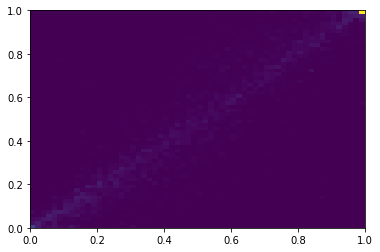

In [60]:
plt.hist2d(X[:,1], X[:,2] , bins = (30,30))

### Preprocessing 

In [40]:
#Bringing the range of the values between 0 to 1
X = X / X.max()

print(X[0:3])

[[0.45098039 0.5254902  0.55294118 ... 0.07843137 0.0745098  0.06666667]
 [0.11764706 0.11372549 0.09411765 ... 0.14509804 0.16078431 0.17254902]
 [0.3372549  0.48235294 0.59607843 ... 0.55686275 0.53333333 0.53333333]]


In [41]:
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size = 0.3, random_state = seed)

### Model Building 

In [42]:
model = Sequential()

model.add(Dense(1024,input_dim=224*224*3, activation = 'sigmoid'))
model.add(Dense(1024, activation = 'sigmoid'))
model.add(Dense(units=1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1024)              154141696 
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 1025      
Total params: 154,142,721
Trainable params: 154,142,721
Non-trainable params: 0
_________________________________________________________________


### Training the model 

In [43]:
model.fit(X_train,y_train,epochs = 60, batch_size = 125, validation_data = (X_valid,y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/60
1646/1646 [==============================] - 22s 13ms/step - loss: 0.6802 - accuracy: 0.5838 - val_loss: 0.7111 - val_accuracy: 0.5609
Epoch 2/60
1646/1646 [==============================] - 22s 13ms/step - loss: 0.6613 - accuracy: 0.6015 - val_loss: 0.6600 - val_accuracy: 0.6544
Epoch 3/60
1646/1646 [==============================] - 22s 13ms/step - loss: 0.6523 - accuracy: 0.6288 - val_loss: 0.6487 - val_accuracy: 0.6091
Epoch 4/60
1646/1646 [==============================] - 20s 12ms/step - loss: 0.6386 - accuracy: 0.6452 - val_loss: 0.7191 - val_accuracy: 0.5609
Epoch 5/60
1646/1646 [==============================] - 19s 12ms/step - loss: 0.6497 - accuracy: 0.6361 - val_loss: 0.6462 - val_accuracy: 0.6034
Epoch 6/60
1646/1646 [==============================] - 20s 12ms/step - loss: 0.6271 - accuracy: 0.6598 - val_loss: 0.6289 - val_accuracy: 0.6530
Epoch 7/60
1646/1646 [==============================] - 19s 12ms/step - loss:

1646/1646 [==============================] - 19s 11ms/step - loss: 0.4947 - accuracy: 0.7795 - val_loss: 0.5895 - val_accuracy: 0.6969
Epoch 57/60
1646/1646 [==============================] - 19s 11ms/step - loss: 0.5014 - accuracy: 0.7667 - val_loss: 0.5608 - val_accuracy: 0.6898
Epoch 58/60
1646/1646 [==============================] - 19s 11ms/step - loss: 0.5095 - accuracy: 0.7618 - val_loss: 0.5573 - val_accuracy: 0.6926
Epoch 59/60
1646/1646 [==============================] - 19s 11ms/step - loss: 0.4993 - accuracy: 0.7637 - val_loss: 0.6592 - val_accuracy: 0.6431
Epoch 60/60
1646/1646 [==============================] - 19s 11ms/step - loss: 0.4990 - accuracy: 0.7728 - val_loss: 0.6612 - val_accuracy: 0.6544


### Printing the predictions along the image  

66 % sure that it is an emergency vehicle
whereas actual class is 0


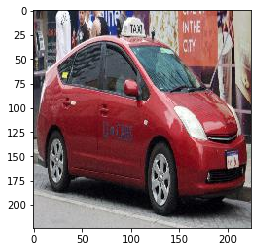

In [44]:
#Get Predictions
predictions = model.predict_classes(X_valid)[:,0]
prediction_probabilities = model.predict(X_valid)[:,0]

#Pull out original image from the data which corresponds to validation data
_,valid_vehicles,_,valid_y = train_test_split(data.image_names.values, y, test_size = 0.30, random_state = seed)

#get a random index to plot index randomly
index = rng.choice(range(len(valid_vehicles)))

#get the corresponding image name and probability
img_name = valid_vehicles[index]
prob = (prediction_probabilities * 100).astype(int)[index]

#read the image
img = plt.imread("C:\\DS\\ML1\\Project\\emergency_classification\\emergency_classification\\images\\" + img_name)


#print the probability and actual class
print(prob,'% sure that it is an emergency vehicle')
print('whereas actual class is', valid_y[index])

#plot the image
plt.imshow(img)




In [45]:
incorrect_indices = np.where(predictions!=y_valid)[0]

In [46]:
len(incorrect_indices),predictions.shape

(244, (706,))

60 % sure that it is an emergency vehicle
whereas actual class is 0


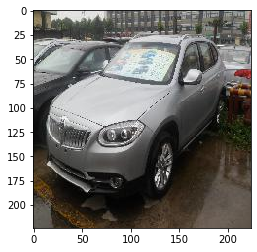

In [48]:
#For incorrect images

index = rng.choice(incorrect_indices)

img_name = valid_vehicles[index]

prob = (prediction_probabilities * 100).astype(int)[index]

img = plt.imread("C:\\DS\\ML1\\Project\\emergency_classification\\emergency_classification\\images\\" + img_name)

print(prob,'% sure that it is an emergency vehicle')
print('whereas actual class is', valid_y[index])

plt.imshow(img)